In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3818,ham,"sorry brah, just finished the last of my exams...",NaN,NaN,NaN
3871,ham,I am joining today formally.Pls keep praying.w...,NaN,NaN,NaN
122,spam,Todays Voda numbers ending 7548 are selected t...,NaN,NaN,NaN
3076,ham,There is no sense in my foot and penis.,NaN,NaN,NaN
4682,ham,Ok u can take me shopping when u get paid =D,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [6]:
df.sample(5)

,target,text
595,ham,I am great! How are you?
3086,ham,So i asked how's anthony. Dad. And your bf
4583,ham,Noooooooo please. Last thing I need is stress....
2751,ham,Play w computer? Aiyah i tok 2 u lor?
430,ham,At home watching tv lor.


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.sample(5)

,target,text
917,0,"When people see my msgs, They think Iam addict..."
1568,0,Today is ACCEPT DAY..U Accept me as? Brother S...
4221,0,Yo you around? A friend of mine's lookin to pi...
3447,0,Its &lt;#&gt; k here oh. Should i send home f...
898,0,"Thursday night? Yeah, sure thing, we'll work i..."


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep = 'first')
df.shape

(5169, 2)

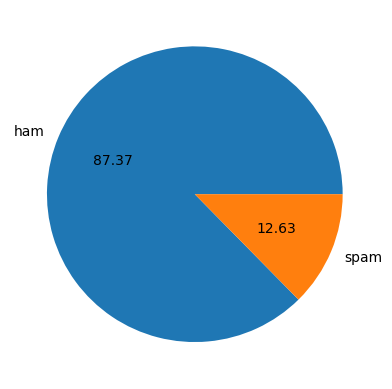

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df['num_character'] = df['text'].apply(len)

In [17]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df.sample(5)

,target,text,num_character,num_words,num_sentences
2969,0,U should make a fb list,23,6,1
1148,0,I'm not driving... Raining! Then i'll get caug...,70,18,2
4768,0,watever reLation u built up in dis world only ...,120,23,2
2191,0,Thankyou so much for the call. I appreciate yo...,54,12,2
3845,0,Pls go there today &lt;#&gt; . I dont want an...,55,17,2


In [21]:
df[df['target'] == 0][['num_character','num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df[df['target'] == 1][['num_character','num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

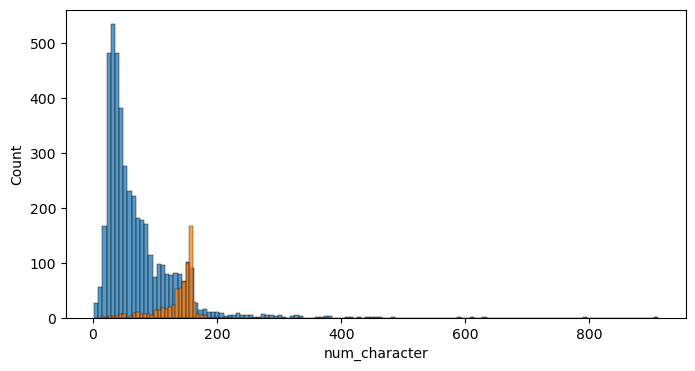

In [25]:
import seaborn as sns
plt.figure(figsize = (8,4))
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'])

<Axes: xlabel='num_words', ylabel='Count'>

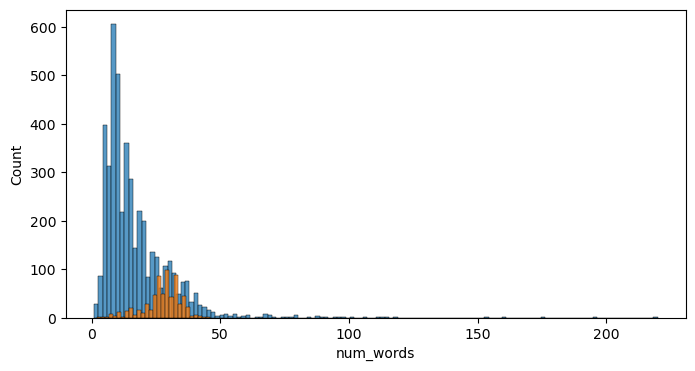

In [26]:
import seaborn as sns
plt.figure(figsize = (8,4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

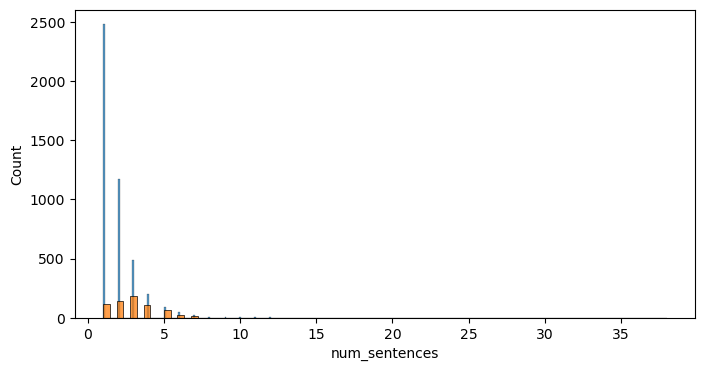

In [27]:
import seaborn as sns
plt.figure(figsize = (8,4))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'])

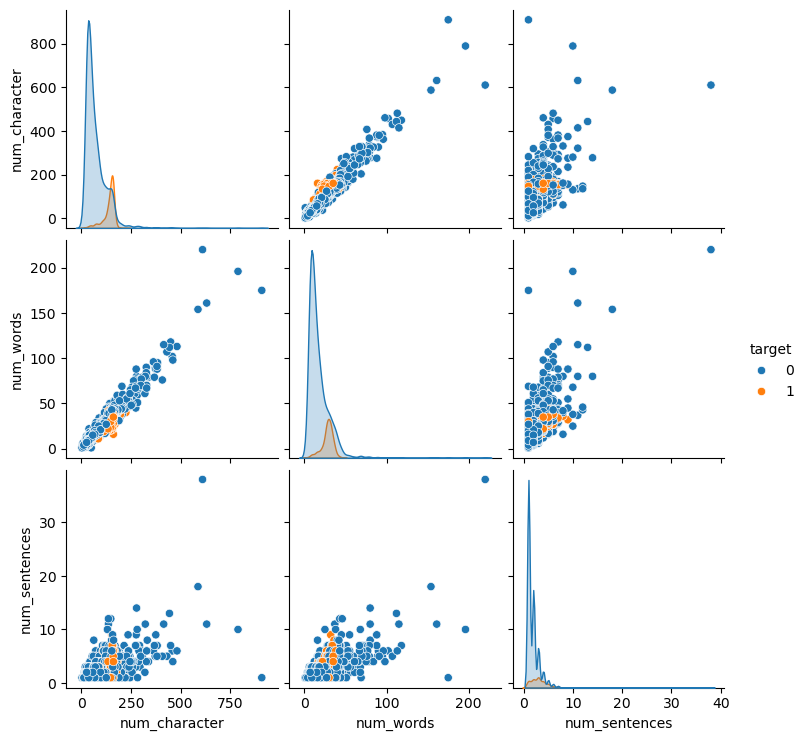

In [28]:
sns.pairplot(df, hue = 'target')

<Axes: >

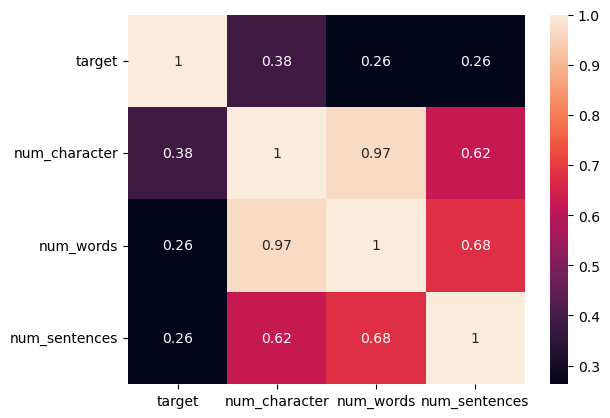

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transformed_text(text):
    # lowercase
    text = text.lower()
    # tokenize
    text = nltk.word_tokenize(text)

    # keep only alphanumeric
    text = [i for i in text if i.isalnum()]

    # remove stopwords and punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    text = [ps.stem(i) for i in text]

    return " ".join(text)


In [31]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [32]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
!pip install wordcloud

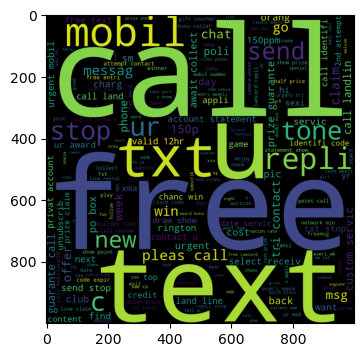

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, background_color = 'black', min_font_size = 10)

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (8,4))
plt.imshow(spam_wc)

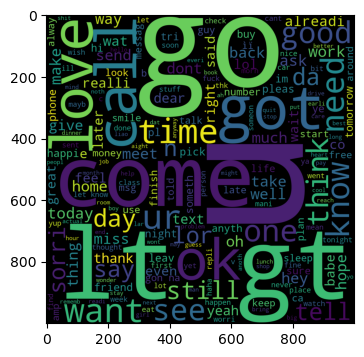

In [36]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, background_color = 'black', min_font_size = 10)

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (8,4))
plt.imshow(ham_wc)

In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

C:\Users\Dell\AppData\Local\Temp\ipykernel_5448\1517262650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette="viridis")


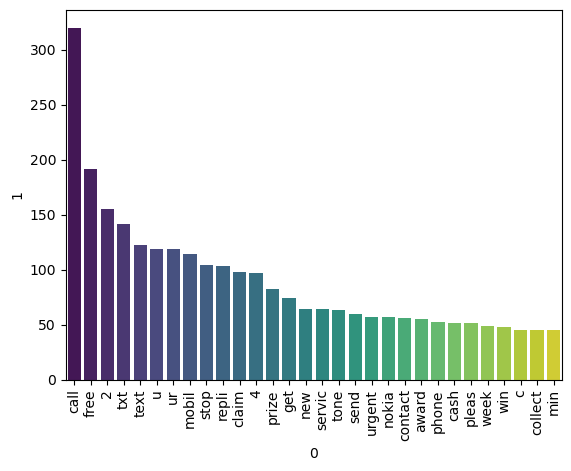

In [39]:
from collections import Counter
import seaborn as sns
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette="viridis")
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

35404

C:\Users\Dell\AppData\Local\Temp\ipykernel_5448\1931221353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette="viridis")


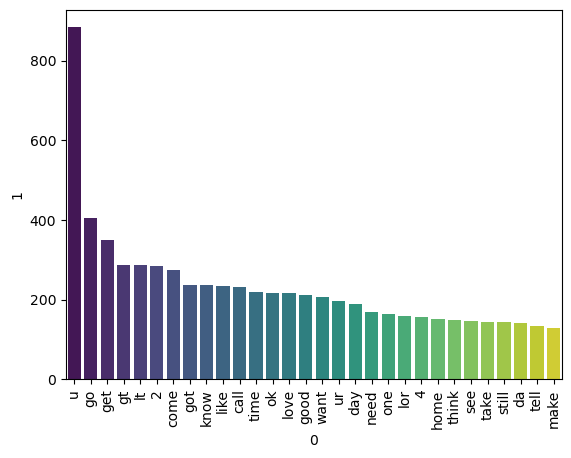

In [42]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette="viridis")
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
# Text Vectorization
# using Bag of Words

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape

(5169, 3000)

In [46]:
y = df['target'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [50]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [51]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [57]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [58]:
import pickle

# Load the saved vectorizer and model
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))


In [ ]:
def classify_message(msg):
    X = vectorizer.transform([msg])   # convert text into vector form
    prediction = model.predict(X)[0]
    return "Spam 🚫" if prediction == 1 else "Not Spam ✅"

while True:
    msg = input("Enter a message (or type 'exit' to quit): ")
    if msg.lower() == "exit":
        break
    print("Result:", classify_message(msg))

Enter a message (or type 'exit' to quit):  It was a great meeting . When is next meeting?


Result: Not Spam ✅
